<a href="https://colab.research.google.com/github/AishahZulkifli/STQD6324_DATA_MANAGEMENT/blob/main/Assignment_1_P132840.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation and Analysis for Personalized Marketing in E-Commerce**

<img src="https://media.licdn.com/dms/image/C4E12AQE3CZIBKItOWg/article-cover_image-shrink_720_1280/0/1610731293666?e=1720656000&v=beta&t=uA6xO9BTitFGMDYSyJhFFT2EsotGeZ73lcSx86mVwH4" width="700" height="400">

## **Introduction**

In this project, I focus on customer segmentation using data from a shopping mall. I chose this field because of my personal interest in e-commerce and retail, where understanding customer behavior is crucial in this competitive industry. By analyzing customer data, businesses can identify different groups based on spending habits and income. These insights allow companies to do marketing strategies, improve customer engagement, and offer personalized services.

In this analysis, I follow a structured approach involving data cleaning, exploratory data analysis, and clustering using the KMeans algorithm. The insights derived will guide marketing teams in developing focused campaigns that focus to each customer group's unique needs. Ultimately, this project will demonstrate how data-driven decisions can enhance business strategies in the retail and e-commerce industries.

## **Data Description**

The dataset from Kaggle, "Mall Customers," contains the following columns:

CustomerID: A unique identifier for each customer.\
Gender: The customer's gender.\
Age: The age of the customer.\
Annual Income (k$): The annual income of the customer in thousand dollars.\
Spending Score (1-100): A score assigned by the mall based on customer behavior and spending nature.


## **Objectives**



*   **Understanding Customer Behavior**:\
By sorting customers based on age, gender, income, and spending habits, the aim is to learn more about the different types of shoppers at the mall. This helps businesses about their marketing strategies for better results.
*   **Improving Targeted Marketing**:\
 Grouping customers allows us to pinpoint what each group wants. Using this information, businesses can create personalized marketing campaigns to boost sales and keep customers coming back.
*   **Enhancing Business Strategies**:\
 Using data to make decisions, to show how businesses can plan better. This involves using resources wisely, offering better products, and finding new opportunities in the market.



## **Methodology**

This project employs a structured approach to segment customers using data from a shopping mall. The goal is to analyze patterns in customer behavior and tailor marketing strategies accordingly.

1. Data Collection:\
Source: The dataset titled "Mall Customers" was sourced from Kaggle.
Content: It includes data on customer demographics and shopping habits, specifically focusing on age, gender, annual income, and spending scores.

2. Data Preparation:\
Cleaning: I checked for and handled missing values and errors, ensuring the data was clean and accurate for analysis.\
Transformation: Key transformations included converting 'Annual Income (k$)' to a full value in Malaysian Ringgit (RM) and encoding categorical variables like gender into numeric format.

3. Exploratory Data Analysis (EDA):\
Purpose: To gain initial insights into the data, I visualized distributions of age, income, and spending scores using histograms and box plots, and examined gender distribution through bar plots.

4. Clustering Analysis:\
Standardization: Features selected for clustering, namely 'Annual Income (RM)' and 'Spending Score (1-100)', were standardized to ensure equal weighting in the analysis process.\
Clustering Technique: I applied the KMeans clustering algorithm to segment customers. The optimal number of clusters was determined using the Elbow Method, and the effectiveness of the clustering was validated with the Silhouette Score.

5. Interpretation and Recommendations:\
Analysis: Each cluster was analyzed to understand its unique characteristics.\
Application: Based on the clustering results, I formulated targeted marketing strategies tailored to the distinct needs of each customer segment.

## **Upload and import files**




In [193]:
# Upload files
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers (2).csv


{'Mall_Customers (2).csv': b'CustomerID,Gender,Age (years),Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n4

In [194]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
data = pd.read_csv('/content/Mall_Customers.csv')

# Check summary of the data
print(data.describe())

# Check the first few rows of the dataset
print(data.head())

       CustomerID  Age (years)  Annual Income (k$)  Spending Score (1-100)
count  200.000000   200.000000          200.000000              200.000000
mean   100.500000    38.850000           60.560000               50.200000
std     57.879185    13.969007           26.264721               25.823522
min      1.000000    18.000000           15.000000                1.000000
25%     50.750000    28.750000           41.500000               34.750000
50%    100.500000    36.000000           61.500000               50.000000
75%    150.250000    49.000000           78.000000               73.000000
max    200.000000    70.000000          137.000000               99.000000
   CustomerID  Gender  Age (years)  Annual Income (k$)  Spending Score (1-100)
0           1    Male           19                  15                      39
1           2    Male           21                  15                      81
2           3  Female           20                  16                       6
3        

In [195]:
# Conversion rate from USD to RM
conversion_rate = 4.5

# Convert 'Annual Income (k$)' to RM
data['Annual Income (RM)'] = data['Annual Income (k$)'] * conversion_rate * 1000  # Multiply by 1000 to convert income to full RM (Ringgit Malaysia)

# Drop the old 'Annual Income (k$)' column because we no longer need it
data.drop('Annual Income (k$)', axis=1, inplace=True)

# Check the updated DataFrame to see the new 'Annual Income (RM)' column
print(data.head())

   CustomerID  Gender  Age (years)  Spending Score (1-100)  Annual Income (RM)
0           1    Male           19                      39             67500.0
1           2    Male           21                      81             67500.0
2           3  Female           20                       6             72000.0
3           4  Female           23                      77             72000.0
4           5  Female           31                      40             76500.0


## **Exploratory Data Analysis (EDA)**

###**Initial Data Inspection**
We'll check for the following:

**Missing Values**: Identify if there are any missing values in the dataset.

**Data Types**: Ensure each column has the appropriate data type for the analysis.

In [196]:
# Check the missing values
print(data.isnull().sum())

# Check data types
print(data.dtypes)

CustomerID                0
Gender                    0
Age (years)               0
Spending Score (1-100)    0
Annual Income (RM)        0
dtype: int64
CustomerID                  int64
Gender                     object
Age (years)                 int64
Spending Score (1-100)      int64
Annual Income (RM)        float64
dtype: object


There are no missing values in the dataset, which is good as it simplifies the preprocessing stage.
The data types are appropriate for each feature, with Gender as an object (categorical) and other features like Age, Annual Income, and Spending Score as integers.

##**Data Visualization**
Visualizing the data can help us understand distributions and spot any obvious trends or outliers.

###**Histograms**
Useful to see the distribution of numerical variables.

<ipython-input-197-5dc3262ccdab>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


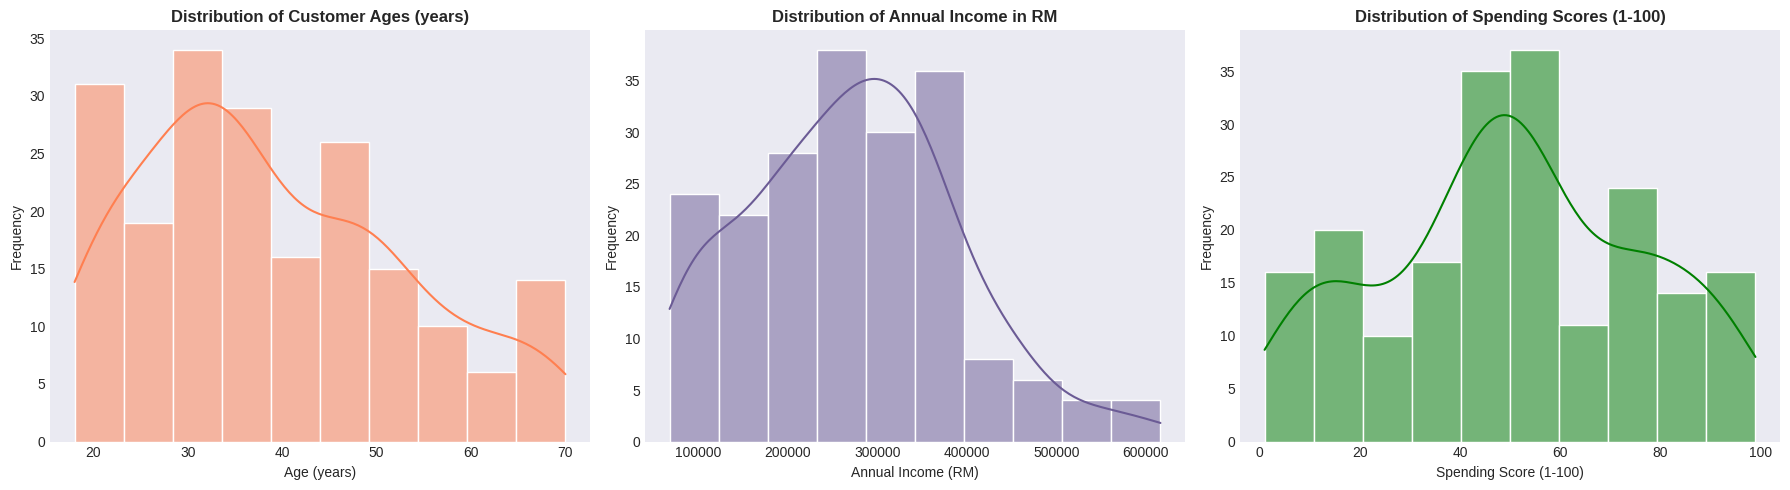

In [197]:
# Set style of the plots
plt.style.use('seaborn-dark')

# Plotting histograms for numerical columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 3 histograms side by side
sns.histplot(data['Age (years)'], bins=10, kde=True, color='coral', ax=axes[0])
axes[0].set_title('Distribution of Customer Ages (years)', fontweight='bold')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Frequency')

sns.histplot(data['Annual Income (RM)'], bins=10, kde=True, color='#6B5B95', ax=axes[1])
axes[1].set_title('Distribution of Annual Income in RM', fontweight='bold')
axes[1].set_xlabel('Annual Income (RM)')
axes[1].set_ylabel('Frequency')

sns.histplot(data['Spending Score (1-100)'], bins=10, kde=True, color='green', ax=axes[2])
axes[2].set_title('Distribution of Spending Scores (1-100)', fontweight='bold')
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Distribution of Customer Ages (years):** \
From the plot, it shows that how old customers are, with most between 25 and 40 years old. This younger group might like more trendy and energetic marketing. Knowing about the ages helps us to decide how to offer promotions and products that they will like.

**Distribution of Annual Income in RM:**\
For the second plot, we can see how much money the customers make every year, in Malaysian Ringgit. Most customers earn between RM 225,000 and RM 337,500. This tells us that the customers are from middle to upper-middle economic groups. We can use this info to make marketing campaigns that match what they can afford.

**Distribution of Spending Scores (1-100):**\
Last plot shows how much the customers are willing to spend, from 1 to 100. The scores are all over the place, which means the customers have very different spending habits. This lets us plan different kinds of marketing, like special deals for those who spend less and rewards for those who spend a lot.

###**Box plots**
It is for detecting outliers.

<ipython-input-198-449b746735b8>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


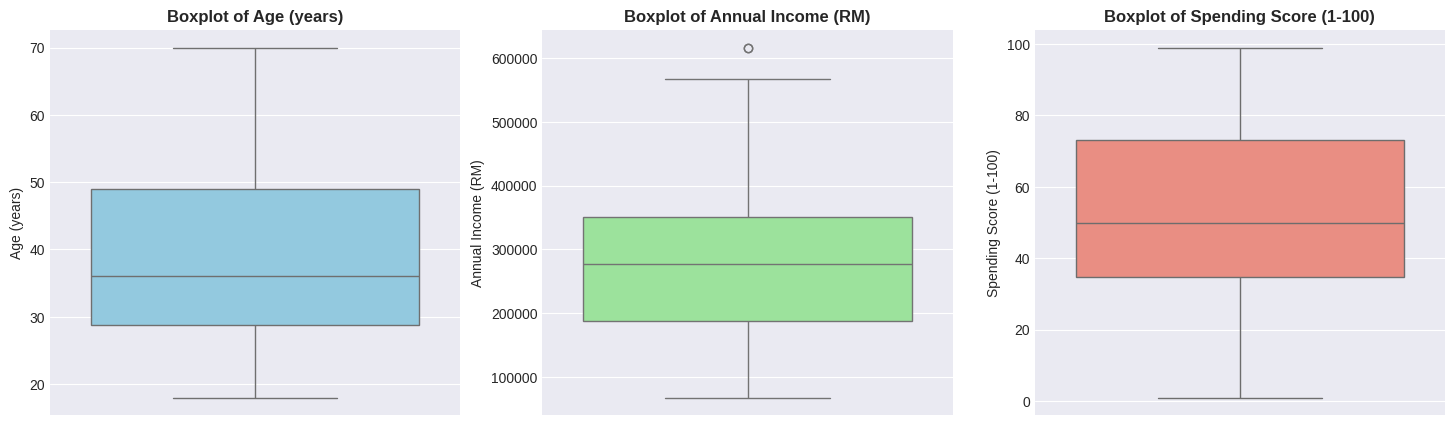

In [198]:
# Set style of the plots
plt.style.use('seaborn-darkgrid')

# Create a figure
plt.figure(figsize=(18, 5))

# Define a list of colors for the boxplots
colors = ['skyblue', 'lightgreen', 'salmon']

# Visualize potential outliers using boxplots
for i, col in enumerate(['Age (years)', 'Annual Income (RM)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[col], color=colors[i])  # Apply different colors
    plt.title(f'Boxplot of {col}', fontweight='bold')

plt.show()


From the boxplots it is shown:

**Age**: There are no apparent outliers in the age distribution.\
**Annual Income**: There are a few high-income outliers.\
**Spending Score**: No significant outliers. The distribution is relatively even.

###**Bar Plots**
Useful for categorical data like Gender.

<ipython-input-239-1f3557737c5f>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-239-1f3557737c5f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=data, palette=['skyblue', 'lightpink'])


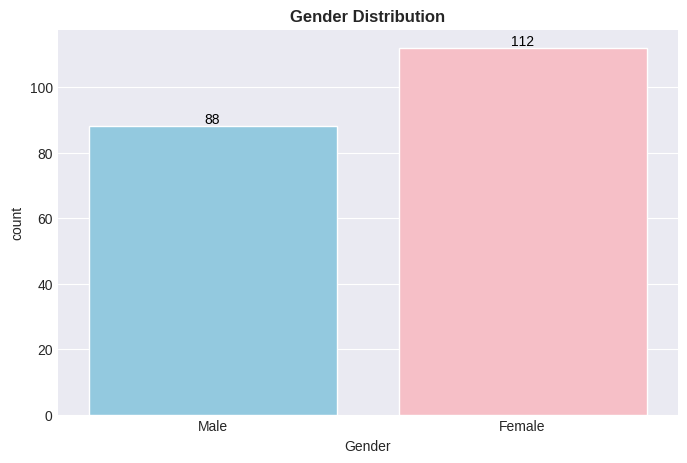

In [239]:
# Set style of the plots
plt.style.use('seaborn-darkgrid')

# Create a figure
plt.figure(figsize=(8, 5))

# Change '0' is coded as 'Female' and '1' as 'Male'
data['Gender'] = data['Gender'].replace({0: 'Male', 1: 'Female'})

# Plotting the Gender Distribution
ax = sns.countplot(x='Gender', data=data, palette=['skyblue', 'lightpink'])

# Adding the title to the plot
plt.title('Gender Distribution', fontweight='bold')

# Adding the value label on the graph
for p in ax.patches:
     ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', color='black',
                xytext = (0, 5),
                textcoords = 'offset points')

From the plot, I can see that more female customers than male, which could influence certain marketing strategies or segment approaches.

###**Pair Plots**
Show relationships between numerical features.


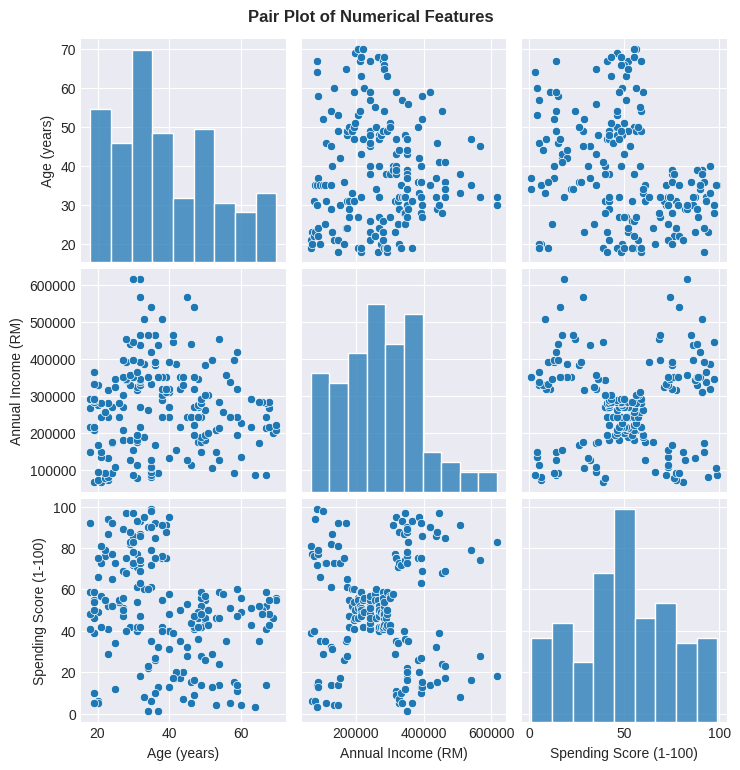

In [200]:
# Pair plots for selected numerical features
sns.pairplot(data[['Age (years)', 'Annual Income (RM)', 'Spending Score (1-100)']])

# Adding the title to the plot
plt.suptitle('Pair Plot of Numerical Features', fontweight='bold', y=1.02)

# Show plot
plt.show()

**Age vs. Annual Income**\
In the Age vs. Annual Income pair plot, younger customers generally fall into middle-income ranges, while older customers are more widely distributed across income levels. These differences can help us understand the varied purchasing power and preferences across different age groups.

**Age vs. Spending Score**\
The Age vs. Spending Score pair plot reveals that younger customers generally have a broad range of spending scores, while older customers tend to cluster around specific score ranges. This pattern suggests that different age groups may have distinct spending habits.

**Annual Income vs. Spending Score**\
In the pair plot of Annual Income vs. Spending Score, the data shows several natural groupings. Customers with higher incomes often have higher spending scores, while those with lower incomes tend to spend less. This relationship can guide us in segmenting customers based on their spending behavior.

## **Segmentation Using Clustering**


Clustering analysis using K-means, which will help us segment the customers based on their "Annual Income" and "Spending Score". This method is commonly used for market segmentation because it's straightforward and effective at finding customer groups based on specified features.

In [201]:
from sklearn.preprocessing import StandardScaler

# Selecting the features for clustering
features = data[['Annual Income (RM)', 'Spending Score (1-100)']]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

###**Applying the Elbow Method**
I used the Elbow Method to find the best number of clusters for our customer data. This method involves plotting changes in the sum of squared distances within clusters against different numbers of clusters. The 'elbow' point on this plot shows the most effective number of clusters, balancing detail with simplicity [(Kodinariya & Makwana, 2013)](https://www.researchgate.net/publication/313554124_Review_on_Determining_of_Cluster_in_K-means_Clustering).

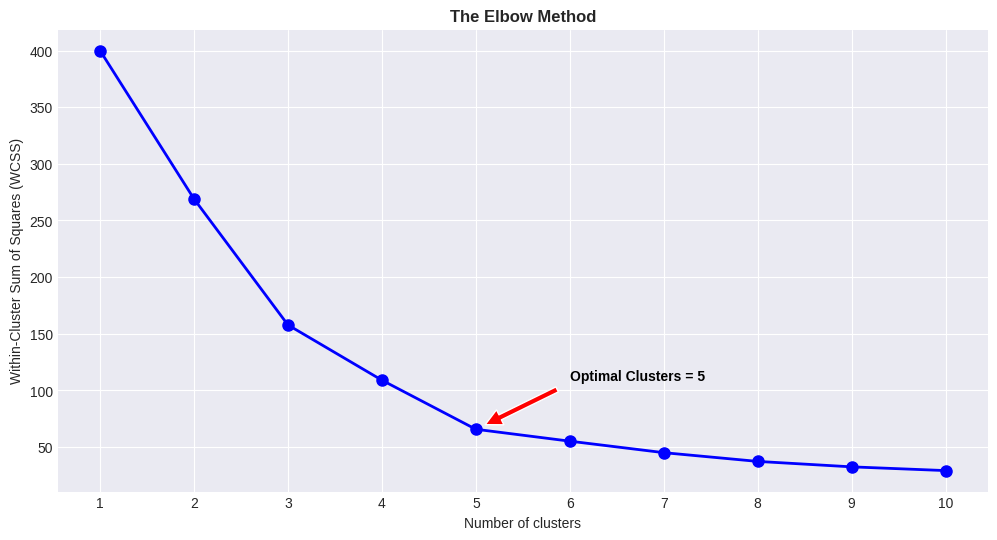

In [202]:
from sklearn.cluster import KMeans

# Calculating WCSS values for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)  # Added line style and marker
plt.title('The Elbow Method', fontweight='bold')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))  # Ensure ticks for each cluster count
plt.grid(True)

# Assign the optimal number of clusters
optimal_clusters = 5
plt.annotate('Optimal Clusters = 5',  # Text to display
             xy=(optimal_clusters, wcss[optimal_clusters-1]),  # Point to annotate
             xytext=(optimal_clusters+1, wcss[optimal_clusters-2]),  # Position of text
             color='black', fontweight='bold',
             arrowprops=dict(facecolor='red', shrink=0.1))

plt.show()

The "elbow" of the plot is around 5 clusters. This is where the drop in WCSS starts to slow down. Beyond 5 clusters, adding more doesn't really reduce the WCSS by much. Choosing 5 clusters seems best because it balances the number of clusters with the WCSS well. Adding more clusters after this might not make the clusters much better.

###**Validation of Clustering with Silhouette Score**

In [203]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# Convert categorical data to numeric
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Selecting numeric columns for clustering
X = data[['Annual Income (RM)', 'Spending Score (1-100)', 'Gender']]

# Fit KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Calculate Silhouette Score
score = silhouette_score(X, kmeans.labels_)

# Display the score
print(f'Silhouette Score: {score:.4f}')

Silhouette Score: 0.5836


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The Silhouette Score measures how well each customer matches with their cluster compared to other clusters. A score of 0.58 means the groups are fairly well separated but not perfect. This score helps confirm that the number of clusters I picked using the Elbow Method is appropriate for our data [(Rousseeuw, 1987)](https://www.sciencedirect.com/science/article/pii/0377042787901257).

###**Visual Representation of Customer Segments**

In [204]:
# The elbow point is k = 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels
data['Cluster'] = clusters + 1

# Viewing the clustered data
print(data.head())

   CustomerID  Gender  Age (years)  Spending Score (1-100)  \
0           1       1           19                      39   
1           2       1           21                      81   
2           3       0           20                       6   
3           4       0           23                      77   
4           5       0           31                      40   

   Annual Income (RM)  Cluster  
0             67500.0        5  
1             67500.0        4  
2             72000.0        5  
3             72000.0        4  
4             76500.0        5  


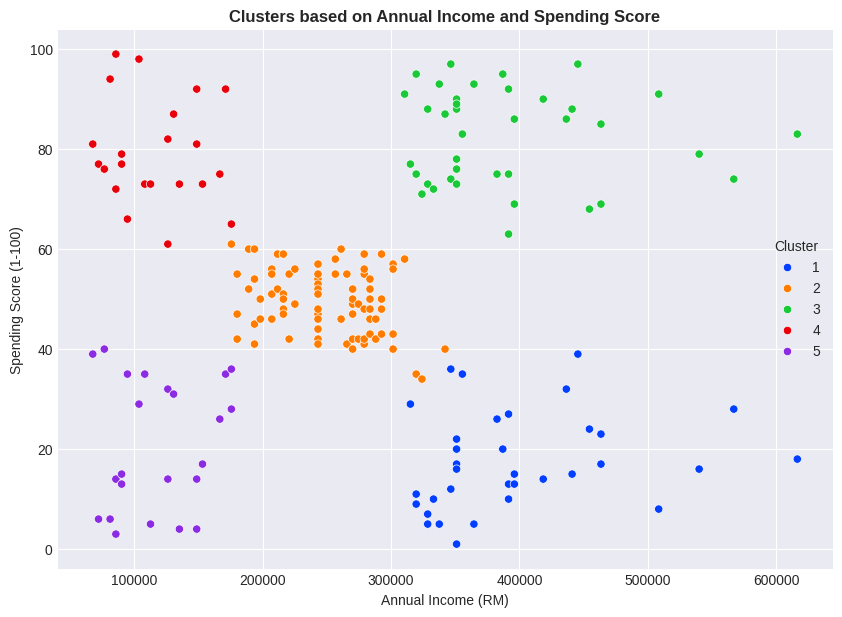

In [205]:
# Scatter plot for Annual Income vs Spending Score
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (RM)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='bright')
plt.title('Clusters based on Annual Income and Spending Score', fontweight='bold')
plt.show()

Based on the K-means clustering results of the customer data, below I provide a summary interpretation of each cluster.

**Cluster 1 (Blue): High Earners, Low Spenders**\
They earn a lot but spend little. Even with high incomes, these customers keep their spending low. They might be saving a lot or very choosy. Send them personalized marketing that emphasizes product value and quality. Offer exclusive memberships or rewards that encourage spending.

**Cluster 2 (Orange): Average Consumers**\
They earn a medium amount and spend a medium amount. This group probably represents the typical shoppers. They spend as most people do. Use normal marketing campaigns. Mix promotions for daily items and some special treats.

**Cluster 3 (Green): Premium Customers**\
They earn a lot and spend a lot. These shoppers buy expensive items freely because they can afford it. Give them special deals and promotions on luxury products. Offer loyalty programs with unique benefits.

**Cluster 4 (Red) : Aspirational Spenders**\
They earn less but spend more. These might be younger customers starting their careers. They spend a lot on the latest trends or social activities. Focus on fashionable and affordable items. Use marketing that highlights style and social status, and offer credit options.

**Cluster 5 (Purple): Cautious Spenders**\
 These customers earn less and are very careful with their spending, likely due to tight budgets. They mainly purchase necessities. To appeal to this group, offer promotions on essential items and discounts that enhance the value of their spending. This approach can help build loyalty and encourage increased spending within their financial constraints.

## **Deepening the Cluster Analysis**

###**Profile Each Cluster Further**

In [206]:
# Display descriptive statistics for each cluster
cluster_descriptive_stats = data.groupby('Cluster').agg({
    'Age (years)': ['mean', 'median', 'std'],
    'Annual Income (RM)': ['mean', 'median', 'std'],
    'Spending Score (1-100)': ['mean', 'median', 'std']
})
print(cluster_descriptive_stats)

        Age (years)                   Annual Income (RM)            \
               mean median        std               mean    median   
Cluster                                                              
1         41.114286   42.0  11.341676      396900.000000  382500.0   
2         42.716049   46.0  16.447822      248833.333333  243000.0   
3         32.692308   32.0   3.728650      389423.076923  355500.0   
4         25.272727   23.5   5.257030      115772.727273  110250.0   
5         45.217391   46.0  13.228607      118369.565217  112500.0   

                      Spending Score (1-100)                    
                  std                   mean median        std  
Cluster                                                         
1        73795.803324              17.114286   16.0   9.952154  
2        40446.492431              49.518519   50.0   6.530909  
3        73406.182378              82.128205   83.0   9.364489  
4        34050.287487              79.363636   77

###**Age Distribution within Each Cluster**

<ipython-input-207-baf6869e239f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age (years)', data=data, palette=custom_palette)


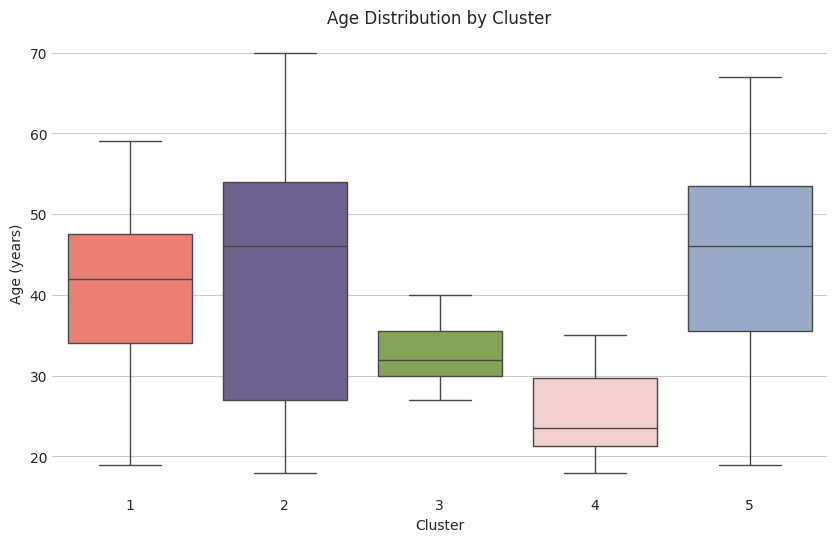

In [207]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Add custom color palette
custom_palette = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']

# Plotting age distribution within each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age (years)', data=data, palette=custom_palette)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age (years)')
plt.show()

* Cluster 1: Customers are generally in their late 40s, with ages tightly grouped around the median.
* Cluster 2: This group has older customers, mainly in their early 50s to mid 50s.
* Cluster 3: Features younger customers, with a wider range of ages from mid 20s to mid 40s.
* Cluster 4: Comprises very young customers, primarily in their late 20s to early 30s.
* Cluster 5: Customers are in their early to mid 40s.




###**Gender Distribution within Each Cluster**

Gender    0   1
Cluster        
1        16  19
2        48  33
3        21  18
4        13   9
5        14   9


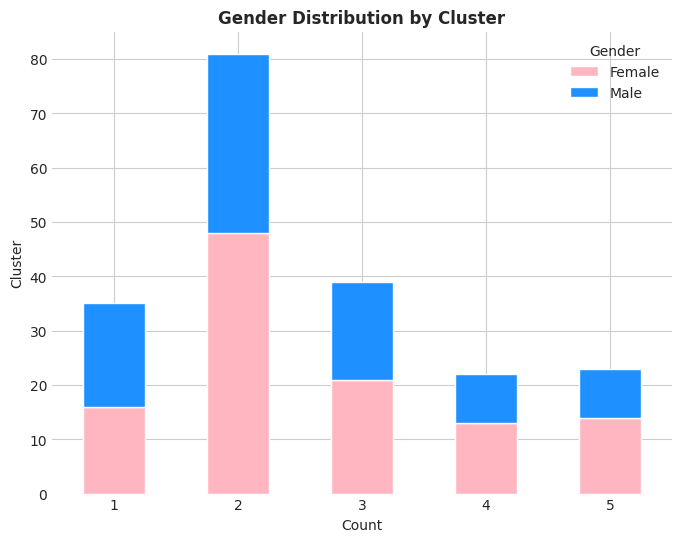

In [225]:
# Count of each gender within each cluster
gender_distribution = pd.crosstab(data['Cluster'], data['Gender'])
print(gender_distribution)

# Plotting gender distribution within each cluster
fig, ax = plt.subplots(figsize=(8, 6))
gender_distribution.plot(kind='bar', stacked=True, ax=ax, color=['lightpink', 'dodgerblue'])
plt.title('Gender Distribution by Cluster', fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Cluster')
ax.set_xticklabels(gender_distribution.index, rotation=0)

# Modify legend labels
handles, labels = ax.get_legend_handles_labels()
labels = ['Female', 'Male']
ax.legend(handles, labels, title='Gender')

plt.show()

* Cluster 1: Contains 16 women and 19 men, with a relatively balanced gender distribution and a slight male majority.
* Cluster 2: The largest cluster, consisting of 48 women and 33 men, has more women than men.
* Cluster 3: Includes 21 women and 18 men, displaying a nearly even balance but with a slight female majority.
* Cluster 4: A smaller cluster with 13 women and 9 men, where women are in the majority.
* Cluster 5: Similar to Cluster 4, it contains 14 women and 9 men, also showing a higher proportion of women.

###**Average Annual Income and Spending Score**

         Annual Income (RM)  Spending Score (1-100)
Cluster                                            
1             396900.000000               17.114286
2             248833.333333               49.518519
3             389423.076923               82.128205
4             115772.727273               79.363636
5             118369.565217               20.913043


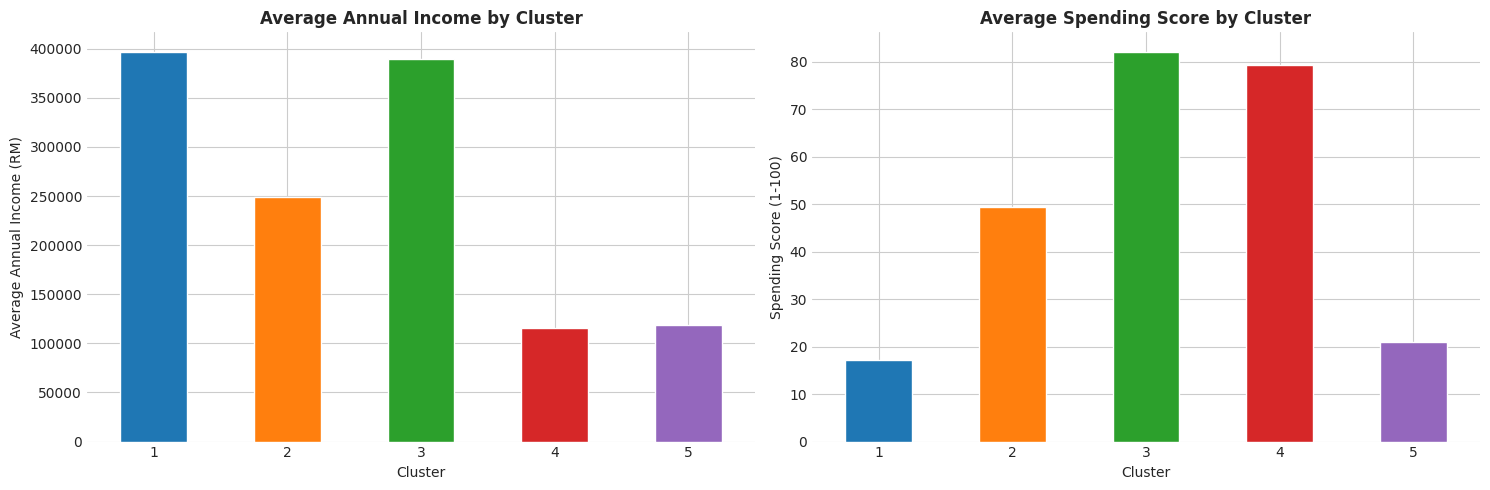

In [226]:
# Calculating average annual income and spending score for each cluster
cluster_summary = data.groupby('Cluster')[['Annual Income (RM)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

# Plotting the averages
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Define colors for each cluster
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plotting average annual income by cluster
cluster_summary['Annual Income (RM)'].plot(kind='bar', color=colors, ax=ax1)
ax1.set_title('Average Annual Income by Cluster', fontweight='bold')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Average Annual Income (RM)')
ax1.set_xticklabels(cluster_summary.index, rotation=0)

# Plotting average spending score by cluster
cluster_summary['Spending Score (1-100)'].plot(kind='bar', color=colors, ax=ax2)
ax2.set_title('Average Spending Score by Cluster', fontweight='bold')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Spending Score (1-100)')
ax2.set_xticklabels(cluster_summary.index, rotation=0)

plt.tight_layout()
plt.show()


**Average Annual Income by Cluster**
* Cluster 1: This cluster has the highest average annual income, significantly higher than any other cluster. People in this group are likely high earners with the ability to afford luxury goods and services.
* Cluster 2: This group earns pretty well each year, but not as much as Cluster 3. So, while they're financially stable, Cluster 3 might have people in even better-paying jobs or with extra sources of income.
* Cluster 3: These folks make more money on average compared to Cluster 2. It suggests they're probably wealthier or have higher-paying jobs. The difference might be because Cluster 3 includes individuals who earn a lot from their jobs, investments, or other financial perks.
* Cluster 4: People in this group earn the least on average. They might have tight budgets, like part-time workers, students, or retirees who spend more on essentials than luxuries.
* Cluster 5: These guys don't earn the least, but still less than most. They might have a bit more money to spare than Cluster 4, but not as much as Clusters 2 and 3. They probably look for good deals but sometimes treat themselves to small luxuries.

**Average Spending Score by Cluster**
* Cluster 1: Even though they earn a lot, this group doesn't spend much. They probably like saving money and being careful with their spending.

* Cluster 2: These people spend a moderate amount. They buy what they need and don't go overboard with spending.

* Cluster 3: Even though they don't make the most money, these folks spend the most. They might really like fancy things and don't mind spending even if they don't earn a lot.

* Cluster 4: They spend a lot too. They might be into buying trendy or expensive stuff, even if it means using up a big part of their income.

* Cluster 5: These guys spend the least. They might be careful with their money or just prefer buying only what they really need.

## **Conclusion**

In conclusion, I divided customers into different groups based on how much they earn and spend. These groups help me understand what different customers might need and want. From here, I can create specific marketing plans that directly address each group's interests, which could help sell more effectively.

I used methods like the Elbow Method and the Silhouette Score to make sure my groups made sense. These methods worked well, but there's always room for improvement. In the future, I might try adding more data, using different ways to group customers, or applying more complex techniques to gain even clearer insights.

In the end, this project shows how important it is to use data to make marketing decisions. Being able to target customers more precisely can lead to happier customers and better sales for businesses.

## **References**

   Kodinariya, T. M., & Makwana, P. R. (2013). Review on determining the number
   of clusters in K-means clustering. International Journal, 1(6), 90-95.

   Rousseeuw, P. J. (1987). Silhouettes: a graphical aid to the interpretation and validation of cluster analysis. Journal of computational and applied mathematics, 20, 53-65.